In [1]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [28]:
data=pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [30]:
unique={col:data[col].nunique() for col in data.columns}
unique

{'age': 41,
 'sex': 2,
 'cp': 4,
 'trestbps': 49,
 'chol': 152,
 'fbs': 2,
 'restecg': 3,
 'thalach': 91,
 'exang': 2,
 'oldpeak': 40,
 'slope': 3,
 'ca': 5,
 'thal': 4,
 'target': 2}

In [31]:
cont={i for i,j in unique.items() if j>5}
cont

{'age', 'chol', 'oldpeak', 'thalach', 'trestbps'}

<AxesSubplot:>

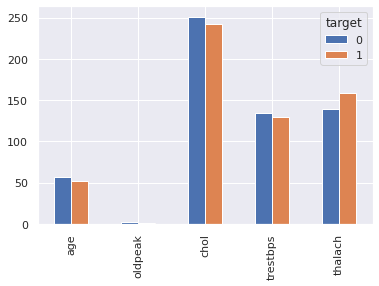

In [32]:
data.groupby('target').mean()[cont].T.plot(kind='bar')

In [33]:
X=data.drop('target',axis=1)
y=data['target']

In [40]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.3)

In [41]:
accuracies=dict()

In [45]:
models={
    LogisticRegression(),
    KNeighborsClassifier(),
    BernoulliNB(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
}

In [47]:
for model in models:
    model.fit(train_x,train_y)
    accuracies[model]=model.score(test_x,test_y)


In [48]:
accuracies

{KNeighborsClassifier(): 0.6153846153846154,
 BernoulliNB(): 0.8131868131868132,
 GradientBoostingClassifier(): 0.7032967032967034,
 LogisticRegression(): 0.8021978021978022,
 DecisionTreeClassifier(): 0.7692307692307693,
 SVC(): 0.6153846153846154,
 RandomForestClassifier(): 0.7912087912087912,
 AdaBoostClassifier(): 0.7582417582417582}

In [56]:
type(model).__name__

'AdaBoostClassifier'

In [57]:
    model_acc={type(model).__name__:acc for model,acc in accuracies.items()}

In [59]:
model_acc

{'KNeighborsClassifier': 0.6153846153846154,
 'BernoulliNB': 0.8131868131868132,
 'GradientBoostingClassifier': 0.7032967032967034,
 'LogisticRegression': 0.8021978021978022,
 'DecisionTreeClassifier': 0.7692307692307693,
 'SVC': 0.6153846153846154,
 'RandomForestClassifier': 0.7912087912087912,
 'AdaBoostClassifier': 0.7582417582417582}

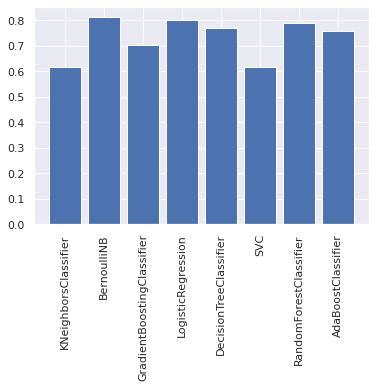

In [66]:
plt.bar(model_acc.keys(),model_acc.values())
plt.xticks(rotation=90);

In [67]:
svc=SVC()

In [94]:
param_grid={
    'C':[0.1,0.01,0.001,1,10],
    'gamma':[0.1,1,10,100,0.001,0.001]
}

In [95]:
grid=GridSearchCV(svc,param_grid,cv=10,verbose=1)

In [96]:
grid.fit(train_x,train_y)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 0.001, 1, 10],
                         'gamma': [0.1, 1, 10, 100, 0.001, 0.001]},
             verbose=1)

In [97]:
grid.best_params_

{'C': 1, 'gamma': 0.001}

In [100]:
svc=SVC(C=1,gamma=0.001)

In [101]:
svc.fit(train_x,train_y,)

SVC(C=1, gamma=0.001)

In [102]:
svc.score(test_x,test_y)

0.6263736263736264

In [103]:
rf=RandomForestClassifier()

In [104]:
param_grid={
    'max_depth':[3,5,7],
    'min_samples_leaf':[3,5,7],
    'min_samples_split':[3,5,7],
    'criterion':['gini','entropy'],
    'n_estimators':[150,250]
}

In [108]:
grid=GridSearchCV(rf,param_grid,cv=3,verbose=2)

In [109]:
grid.fit(X,y)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=150; total time=   0.2s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=150; total time=   0.2s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=150; total time=   0.2s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=250; total time=   0.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=250; total time=   0.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=250; total time=   0.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END 

[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=7, n_estimators=250; total time=   0.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=150; total time=   0.2s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=150; total time=   0.2s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=150; total time=   0.2s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=250; total time=   0.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=250; total time=   0.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=250; total time=   0.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_sp

[CV] END criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=7, n_estimators=250; total time=   0.4s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=7, n_estimators=250; total time=   0.4s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=3, n_estimators=150; total time=   0.2s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=3, n_estimators=150; total time=   0.2s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=3, n_estimators=150; total time=   0.2s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=3, n_estimators=250; total time=   0.4s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=3, n_estimators=250; total time=   0.4s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=3, n_estimators=250; total time=   0.4s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_sp

[CV] END criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7, n_estimators=150; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7, n_estimators=250; total time=   0.4s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7, n_estimators=250; total time=   0.4s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7, n_estimators=250; total time=   0.4s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=150; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=150; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=150; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=250; total time=   0.4s
[CV] END criterion=entropy, max_depth=5, min_sam

[CV] END criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=250; total time=   0.4s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=7, n_estimators=150; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=7, n_estimators=150; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=7, n_estimators=150; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=7, n_estimators=250; total time=   0.4s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=7, n_estimators=250; total time=   0.4s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=7, n_estimators=250; total time=   0.4s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=150; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, min_sam

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [3, 5, 7],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [150, 250]},
             verbose=2)

In [110]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 250}

In [111]:
grid.best_score_

0.8448844884488449